<a href="https://colab.research.google.com/github/theiaa7/PythonLC/blob/main/P2_Data_Cleansing_text_Sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

import numpy as np # pemakaian linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm import tqdm # looping

pd.options.display.max_colwidth = 200 #max display lebar dari column nya

import warnings
warnings.filterwarnings('ignore')

# Contents

*   Read the dataset (corpus)
*   Data Cleaning


# Read the Dataset
Dataset link : https://www.kaggle.com/c/medical-notes/data. /- https://www.mtsamples.com/

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Cleaned_POS_Medical_Notes.csv to Cleaned_POS_Medical_Notes.csv


In [ ]:
import io
df = pd.read_csv(io.StringIO(uploaded['Cleaned_POS_Medical_Notes.csv'].decode('utf-8')))
# io.StringIO, ngubah semua character yang ada di filenya menjadi string jadi data ini text-only data
# decode('utf-8') ini buat decoder kode universal untuk internasionalisasi dan mampu mengodekan seluruh set karakter Unicode
df

,text,label,clean_text
0,\n \n \n \n \n <B>CC:</B> Difficulty with word finding.\n \n <B>HX: </B>This 27y/o RHF experienced sudden onset word finding difficulty and slurred speech on the evening of 2/19/96. She denied any...,Neurology,"difficulty word find . rhf experience sudden onset word find difficulty slurred speech evening 2/19/96 . deny associate dysphagia , diplopia , numbness weakness extremity . go sleep symptom 2/19/9..."
1,\n \n \n \n \n <B>PREOPERATIVE DIAGNOSIS: </B> Ganglion of the left wrist.\n \n <B>POSTOPERATIVE DIAGNOSIS: </B> Ganglion of the left wrist.\n \n <B>OPERATION: </B> Excision of ganglion.\n \n <B>A...,Orthopedic,"preoperative ganglion left wrist . postoperative ganglion left wrist . excision ganglion . general . estimate blood less 5 ml . successful anesthetic , patient position operating table . tournique..."
2,"\n \n \n \n \n <B>PREOPERATIVE DIAGNOSIS: </B> Cervical myelopathy, C3-4, secondary to stenosis from herniated nucleus pulposus, C3-4.\n \n <B>POSTOPERATIVE DIAGNOSES: </B> Cervical myelopathy, C3...",Orthopedic,"preoperative cervical myelopathy , c3 - 4 , secondary stenosis herniated nucleus pulposus , c3 - 4 . postoperative cervical myelopathy , c3 - 4 , secondary stenosis herniated nucleus pulposus , c3..."
3,\n \n \n \n \n <B>EXAM:</B>MRI LEFT SHOULDER\n \n <B>CLINICAL:</B>This is a 69-year-old male with pain in the shoulder. Evaluate for rotator cuff tear.\n \n <B>FINDINGS:</B>\n \n Examination was p...,Radiology,"mri leave shoulder 69-year - old male pain shoulder . evaluate rotator cuff tear . examination perform 9/1/05 . mark supraspinatus tendinosis extensive tearing substance tendon articular surface ,..."
4,\n \n \n \n \n <B>HISTORY OF PRESENT ILLNESS: </B> The patient is a 57-year-old female being seen today for evaluation of pain and symptoms related to a recurrent bunion deformity in bilateral fee...,Orthopedic,"history present patient 57-year - old female see today evaluation pain symptom relate recurrent bunion deformity bilateral foot , great leave . patient state increase symptom pain discomfort assoc..."
...,...,...,...
813,"\n \n \n \n \n <B>EXAM: </B> CT chest with contrast.\n \n <B>HISTORY: </B> Abnormal chest x-ray, which demonstrated a region of consolidation versus mass in the right upper lobe.\n \n <B>TECHNIQUE...",Radiology,"ct chest contrast . abnormal chest x - ray , demonstrate region consolidation mass right upper lobe . post contrast - enhance spiral image obtain chest . several , discrete , patchy air - space op..."
814,"\n \n \n \n \n <B>CC:</B> Episodic mental status change and RUE numbness, and chorea (found on exam).\n \n <B>HX:</B> This 78y/o RHM was referred for an episode of unusual behavior and RUE numbnes...",Radiology,"episodic mental status change numbness , chorea find exam . 78y rhm refer episode unusual behavior numbness . 9/91 , experience loss consciousness , generalize weakness , headache vomiting . evalu..."
815,"\n \n \n \n \n <B>PROCEDURE IN DETAIL: </B> Following premedication with Vistaril 50 mg and Atropine 0.4 mg IM, the patient received Versed 5.0 mg intravenously after Cetacaine spray to the poster...",Gastroenterology,"procedure follow premedication vistaril 50 mg atropine 0.4 mg , patient receive versed 5.0 mg cetacaine spray posterior palate . olympus video gastroscope introduce upper esophagus pass direct vis..."
816,\n \n \n \n \n <B>REASON FOR VISIT: </B> Overactive bladder with microscopic hematuria.\n \n <B>HISTORY OF PRESENT ILLNESS: </B> The patient is a 56-year-old noted to have microscopic hematuria wi...,Urology,reason overactive bladder microscopic hematuria . history present patient 56-year - old note microscopic hematuria overactive bladder . cystoscopy perform unremarkable . continue episode frequency...


In [ ]:
df.columns # check field

Index(['text', 'label', 'clean_text'], dtype='object')

In [ ]:
df.head(5) # check head data

,text,label,clean_text
0,\n \n \n \n \n <B>CC:</B> Difficulty with word finding.\n \n <B>HX: </B>This 27y/o RHF experienced sudden onset word finding difficulty and slurred speech on the evening of 2/19/96. She denied any...,Neurology,"difficulty word find . rhf experience sudden onset word find difficulty slurred speech evening 2/19/96 . deny associate dysphagia , diplopia , numbness weakness extremity . go sleep symptom 2/19/9..."
1,\n \n \n \n \n <B>PREOPERATIVE DIAGNOSIS: </B> Ganglion of the left wrist.\n \n <B>POSTOPERATIVE DIAGNOSIS: </B> Ganglion of the left wrist.\n \n <B>OPERATION: </B> Excision of ganglion.\n \n <B>A...,Orthopedic,"preoperative ganglion left wrist . postoperative ganglion left wrist . excision ganglion . general . estimate blood less 5 ml . successful anesthetic , patient position operating table . tournique..."
2,"\n \n \n \n \n <B>PREOPERATIVE DIAGNOSIS: </B> Cervical myelopathy, C3-4, secondary to stenosis from herniated nucleus pulposus, C3-4.\n \n <B>POSTOPERATIVE DIAGNOSES: </B> Cervical myelopathy, C3...",Orthopedic,"preoperative cervical myelopathy , c3 - 4 , secondary stenosis herniated nucleus pulposus , c3 - 4 . postoperative cervical myelopathy , c3 - 4 , secondary stenosis herniated nucleus pulposus , c3..."
3,\n \n \n \n \n <B>EXAM:</B>MRI LEFT SHOULDER\n \n <B>CLINICAL:</B>This is a 69-year-old male with pain in the shoulder. Evaluate for rotator cuff tear.\n \n <B>FINDINGS:</B>\n \n Examination was p...,Radiology,"mri leave shoulder 69-year - old male pain shoulder . evaluate rotator cuff tear . examination perform 9/1/05 . mark supraspinatus tendinosis extensive tearing substance tendon articular surface ,..."
4,\n \n \n \n \n <B>HISTORY OF PRESENT ILLNESS: </B> The patient is a 57-year-old female being seen today for evaluation of pain and symptoms related to a recurrent bunion deformity in bilateral fee...,Orthopedic,"history present patient 57-year - old female see today evaluation pain symptom relate recurrent bunion deformity bilateral foot , great leave . patient state increase symptom pain discomfort assoc..."


In [ ]:
df.shape # check total row + column

(818, 3)

## Basic data cleaning
Data teks yang berbentuk bahasa menghasilkan banyak keabu-abuan di dalamnya. Kita perlu membersihkan data terlebih dahulu untuk dapat mengetahui statistical/machine learning model yang tepat. beberapa dibawah ini adalah teknik yang digunakan :

Using RegEx (regular expressions) untuk identifying text tidak relevan untuk dibuang.
Standardizing/normalizing teks untuk - singkatan, dan ejaan yang salah seperti typo
dan untuk social media data - membuang smileys emote, email ids jika tidak diperlukan

In [ ]:
sample_text = df.text.iloc[3] # buat variable sample_text dengan bentuk text dari iloc = index location ke-3
print(sample_text)
# dibawah ini isi text yang telah di decode dengan utf-8


 
 
 
 
 <B>EXAM:</B>MRI LEFT SHOULDER
 
 <B>CLINICAL:</B>This is a 69-year-old male with pain in the shoulder. Evaluate for rotator cuff tear.
 
 <B>FINDINGS:</B>
 
 Examination was performed on 9/1/05.
 
 There is marked supraspinatus tendinosis and extensive tearing of the substance of the tendon and articular surface, extending into the myotendinous junction as well. There is still a small rim of tendon along the bursal surface, although there may be a small tear at the level of the rotator interval. There is no retracted tendon or muscular atrophy (series #6 images #6-17).
 
 Normal infraspinatus tendon.
 
 There is subscapularis tendinosis with fraying and partial tearing of the superior most fibers extending to the level of the rotator interval (series #9 images #8-13; series #3 images #8-14). There is no complete tear, gap or fiber retraction and there is no muscular atrophy.
 
 There is tendinosis and superficial tearing of the long biceps tendon within the bicipital groove, 

In [ ]:
import re # re ini regular expression yang tadi di atas di jelasin
def remove_html(text): #define variable fungsi remove html/html tag dalam bentuk dari variable apapun yang berbentuk text
    text = text.replace("\n"," ") #yang ini tiap ada baris baru pake /n di ganti pake spasi aja yang ada di var text
    pattern = re.compile('<.*?>') #semua HTML tags
    return pattern.sub(r'', text) #return

In [ ]:
sample_text_processed = remove_html(sample_text) #var baru jalanin fungsi dari var remove_html dengan parameter sample_text
print(sample_text_processed)

          EXAM:MRI LEFT SHOULDER    CLINICAL:This is a 69-year-old male with pain in the shoulder. Evaluate for rotator cuff tear.    FINDINGS:    Examination was performed on 9/1/05.    There is marked supraspinatus tendinosis and extensive tearing of the substance of the tendon and articular surface, extending into the myotendinous junction as well. There is still a small rim of tendon along the bursal surface, although there may be a small tear at the level of the rotator interval. There is no retracted tendon or muscular atrophy (series #6 images #6-17).    Normal infraspinatus tendon.    There is subscapularis tendinosis with fraying and partial tearing of the superior most fibers extending to the level of the rotator interval (series #9 images #8-13; series #3 images #8-14). There is no complete tear, gap or fiber retraction and there is no muscular atrophy.    There is tendinosis and superficial tearing of the long biceps tendon within the bicipital groove, and there is high gra

Membuat fungsi untuk menghilangkan Heading

In [ ]:
def remove_headings(text):
    pattern = re.compile('\w+:')
    return pattern.sub(r'', text)

In [ ]:
sample_text_processed = remove_headings(sample_text_processed)
print (sample_text_processed)
# liat EXAM : <~ ini adalah heading yang hilang dari contoh sebelumnya

          MRI LEFT SHOULDER    This is a 69-year-old male with pain in the shoulder. Evaluate for rotator cuff tear.        Examination was performed on 9/1/05.    There is marked supraspinatus tendinosis and extensive tearing of the substance of the tendon and articular surface, extending into the myotendinous junction as well. There is still a small rim of tendon along the bursal surface, although there may be a small tear at the level of the rotator interval. There is no retracted tendon or muscular atrophy (series #6 images #6-17).    Normal infraspinatus tendon.    There is subscapularis tendinosis with fraying and partial tearing of the superior most fibers extending to the level of the rotator interval (series #9 images #8-13; series #3 images #8-14). There is no complete tear, gap or fiber retraction and there is no muscular atrophy.    There is tendinosis and superficial tearing of the long biceps tendon within the bicipital groove, and there is high grade (near complete) part

Remove &quot marks dan character lain. mengganti double spasi dengan single

In [ ]:
def replace_mult_spaces(text):
    text = text.replace("&quot","")
    pattern = re.compile(' +')
    text = pattern.sub(r' ', text)
    text = text.strip()
    return text

def replace_other_chars(text):
    pattern = re.compile(r'[()!@&;#]')
    text = pattern.sub(r'', text)
    return text

In [ ]:
sample_text_processed = replace_mult_spaces(sample_text_processed)
print (sample_text_processed)

MRI LEFT SHOULDER This is a 69-year-old male with pain in the shoulder. Evaluate for rotator cuff tear. Examination was performed on 9/1/05. There is marked supraspinatus tendinosis and extensive tearing of the substance of the tendon and articular surface, extending into the myotendinous junction as well. There is still a small rim of tendon along the bursal surface, although there may be a small tear at the level of the rotator interval. There is no retracted tendon or muscular atrophy (series #6 images #6-17). Normal infraspinatus tendon. There is subscapularis tendinosis with fraying and partial tearing of the superior most fibers extending to the level of the rotator interval (series #9 images #8-13; series #3 images #8-14). There is no complete tear, gap or fiber retraction and there is no muscular atrophy. There is tendinosis and superficial tearing of the long biceps tendon within the bicipital groove, and there is high grade (near complete) partial tearing of the intracapsular

In [ ]:
sample_text_processed = replace_other_chars(sample_text_processed)
print (sample_text_processed)

MRI LEFT SHOULDER This is a 69-year-old male with pain in the shoulder. Evaluate for rotator cuff tear. Examination was performed on 9/1/05. There is marked supraspinatus tendinosis and extensive tearing of the substance of the tendon and articular surface, extending into the myotendinous junction as well. There is still a small rim of tendon along the bursal surface, although there may be a small tear at the level of the rotator interval. There is no retracted tendon or muscular atrophy series 6 images 6-17. Normal infraspinatus tendon. There is subscapularis tendinosis with fraying and partial tearing of the superior most fibers extending to the level of the rotator interval series 9 images 8-13 series 3 images 8-14. There is no complete tear, gap or fiber retraction and there is no muscular atrophy. There is tendinosis and superficial tearing of the long biceps tendon within the bicipital groove, and there is high grade near complete partial tearing of the intracapsular portion of t

Membuat fungsi untuk membuat clean-text dalam 1 function lalu membuat semua text lower case (huruf kecil).

In [ ]:
def clean_text(text):
    text = remove_html(text)
    text = remove_headings(text)
    text = replace_mult_spaces(text)
    text = replace_other_chars(text)
    text = text.lower()
    return text

In [ ]:
clean = clean_text(sample_text)
print(clean)

mri left shoulder this is a 69-year-old male with pain in the shoulder. evaluate for rotator cuff tear. examination was performed on 9/1/05. there is marked supraspinatus tendinosis and extensive tearing of the substance of the tendon and articular surface, extending into the myotendinous junction as well. there is still a small rim of tendon along the bursal surface, although there may be a small tear at the level of the rotator interval. there is no retracted tendon or muscular atrophy series 6 images 6-17. normal infraspinatus tendon. there is subscapularis tendinosis with fraying and partial tearing of the superior most fibers extending to the level of the rotator interval series 9 images 8-13 series 3 images 8-14. there is no complete tear, gap or fiber retraction and there is no muscular atrophy. there is tendinosis and superficial tearing of the long biceps tendon within the bicipital groove, and there is high grade near complete partial tearing of the intracapsular portion of t

## **Basic descriptive analysis on the texts**
dibawah ada perbandingan nya, semua process diatas itu udah di looping dengan defining function text, sample_processed_text ataupun sample_text itu cuma buat kita ambil sample untuk melihat process didalam 1 index location

In [ ]:
df.clean_text

0      difficulty word find . rhf experience sudden onset word find difficulty slurred speech evening 2/19/96 . deny associate dysphagia , diplopia , numbness weakness extremity . go sleep symptom 2/19/9...
1      preoperative ganglion left wrist . postoperative ganglion left wrist . excision ganglion . general . estimate blood less 5 ml . successful anesthetic , patient position operating table . tournique...
2      preoperative cervical myelopathy , c3 - 4 , secondary stenosis herniated nucleus pulposus , c3 - 4 . postoperative cervical myelopathy , c3 - 4 , secondary stenosis herniated nucleus pulposus , c3...
3      mri leave shoulder 69-year - old male pain shoulder . evaluate rotator cuff tear . examination perform 9/1/05 . mark supraspinatus tendinosis extensive tearing substance tendon articular surface ,...
4      history present patient 57-year - old female see today evaluation pain symptom relate recurrent bunion deformity bilateral foot , great leave . patient state increas

In [ ]:
df.text

0      \n \n \n \n \n <B>CC:</B> Difficulty with word finding.\n \n <B>HX: </B>This 27y/o RHF experienced sudden onset word finding difficulty and slurred speech on the evening of 2/19/96. She denied any...
1      \n \n \n \n \n <B>PREOPERATIVE DIAGNOSIS: </B> Ganglion of the left wrist.\n \n <B>POSTOPERATIVE DIAGNOSIS: </B> Ganglion of the left wrist.\n \n <B>OPERATION: </B> Excision of ganglion.\n \n <B>A...
2      \n \n \n \n \n <B>PREOPERATIVE DIAGNOSIS: </B> Cervical myelopathy, C3-4, secondary to stenosis from herniated nucleus pulposus, C3-4.\n \n <B>POSTOPERATIVE DIAGNOSES: </B> Cervical myelopathy, C3...
3      \n \n \n \n \n <B>EXAM:</B>MRI LEFT SHOULDER\n \n <B>CLINICAL:</B>This is a 69-year-old male with pain in the shoulder. Evaluate for rotator cuff tear.\n \n <B>FINDINGS:</B>\n \n Examination was p...
4      \n \n \n \n \n <B>HISTORY OF PRESENT ILLNESS: </B> The patient is a 57-year-old female being seen today for evaluation of pain and symptoms related to a recurrent bu

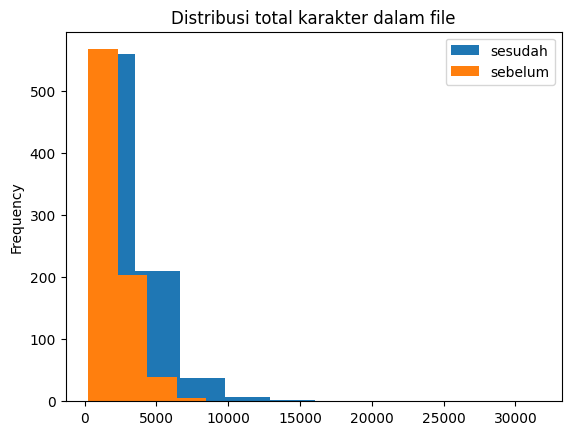

In [ ]:
import matplotlib.pyplot as plt

df.text.apply(len).plot.hist()
df.clean_text.apply(len).plot.hist()
plt.title("Distribusi total karakter dalam file")
plt.legend(["sesudah","sebelum"])
plt.show()
# x = density, y = freq
# maksudnya density itu, 0-5000, yang dalam 1 index ada 0-5000 kata itu ada berapa banyak
# frequency, contohnya lihat pada bar 0 density text, terdapat 500+ index yang mempunyai 0 character pada text nya
# pada mark 5000 density, bisa diliat sebelum < 100 data, tapi sesudah > 200 data
# maka bisa disimpulkan, penggunaan spasi yang tidak dibutuhkan dan karakter pemisah telah di buang

In [ ]:
df.text.apply(len)

0      5594
1      1664
2      6914
3      2880
4      3367
       ... 
813     864
814    5888
815     733
816    1269
817    1947
Name: text, Length: 818, dtype: int64

In [ ]:
df.clean_text.apply(len)

0      3866
1       997
2      4428
3      1975
4      2227
       ... 
813     564
814    4303
815     484
816     734
817    1372
Name: clean_text, Length: 818, dtype: int64